<a target="_blank" href="https://colab.research.google.com/github/davalpez/MyKaggle/blob/MyKaggle/Tensorflow%20basics/TF-transfer_learning.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Transfer learning

Just at the end of our CNN notebook, we were mentioning that we can use transfer learning to set up neural networks that have been trained previously to build a more effective network for ourselves to achieve more efficient solutions against the problem we are solving with out model.

Traning the model we found the most efficient after couple of experiment took 15 minutes for 50 epoch ( 3.33 epoch/min). If we wanted to train it for 600 epochs, what could be the amount that sometimes we see in the papers when they train and test the models that have been presented, it can take beyond 3 hours.

Loading previous models that we have trained ourselves is a good way to save time if we are trying to solve similar problems. Using pre-existing trained models avilable that have been more extensively trained for similar purposes is a good way, sometimes even better, to tackle the amount of time needed to solve our problem.

Let's start by loading back the food dataset and loading the model we did on TF-CNN as well. 

## Loading the dataset

We were working last time with the Food-101 dataset. We choose only 11 classes from this dataset and divided into different train and test folder so we could manipulate easier the data in it, facilitating the class separation and the labels when [calling image_dataset_from_director](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [33]:
# %matplotlib widget

In [34]:
import os

for dirpath, dirnames, filenames in os.walk("../Sources/Food-101-11"):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 2 Directories and 0 images in '../Sources/Food-101-11'.
 11 Directories and 0 images in '../Sources/Food-101-11/test'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/hamburger'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/pancakes'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/oysters'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/risotto'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tuna_tartare'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tiramisu'.
 0 Directories and 600 images in '../Sources/Food-101-11/test/sushi'.
 0 Directories and 600 images in '../Sources/Food-101-11/test/steak'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/tacos'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/waffles'.
 0 Directories and 300 images in '../Sources/Food-101-11/test/takoyaki'.
 11 Directories and 0 images in '../Sources/Food-101-11/train'.
 0 Directories and 7

In [35]:
# Import tensorflow and confirm the GPU availability.
import tensorflow as tf
tf.config.set_soft_device_placement(True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [36]:
# Define directory path
training_11_dir= "../Sources/Food-101-11/train"
testing_11_dir = "../Sources/Food-101-11/test"

In [37]:
# Create datasets
train_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

test_11_dataset = tf.keras.preprocessing.image_dataset_from_directory(testing_11_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224), # resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)

Found 7700 files belonging to 11 classes.
Found 3300 files belonging to 11 classes.


In [38]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np

data_dir = pathlib.Path(training_11_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['hamburger' 'oysters' 'pancakes' 'risotto' 'steak' 'sushi' 'tacos'
 'takoyaki' 'tiramisu' 'tuna_tartare' 'waffles']


## Importing our model

As we have done before, we can retrieve and load the model we trained in our last session, which will save us a great amount of time if we want to re-test o re-train to improve out classification task.

In [39]:
# Import tensorflow and confirm the GPU availability.
import tensorflow as tf
tf.config.set_soft_device_placement(True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [40]:
model_50e_mixaug =tf.keras.models.load_model("saved_models/50e-11class-mixaug.keras")

In [41]:
model_50e_mixaug.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_3 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_3               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_1 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_1 (Activation)           │ (None, 222, 222, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_1_2 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_1_2 (Activation)           │ (None, 220, 220, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_1 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_1 (Activation)           │ (None, 108, 108, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2_2 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ relu_2_2 (Activation)           │ (None, 106, 106, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 112360)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 11)             │     1,235,971 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,716,945 (14.18 MB)

 Trainable params: 1,238,981 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,477,964 (9.45 MB)

Perfect! we can confirm this was or model. We can also retrieve the prediction function we were using in our TF-CNN. We will load some older functions by importing them from modelgraph.py, a library file we will use to call old functions we have been using so far.

In [42]:
import sys
import os

sys.path.append(os.path.abspath("../lib"))

In [43]:
import importlib
import modelgraph  # Import the module
importlib.reload(modelgraph)  # Reload it after changes

<module 'modelgraph' from '/home/david/VSpython/Git/lib/modelgraph.py'>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


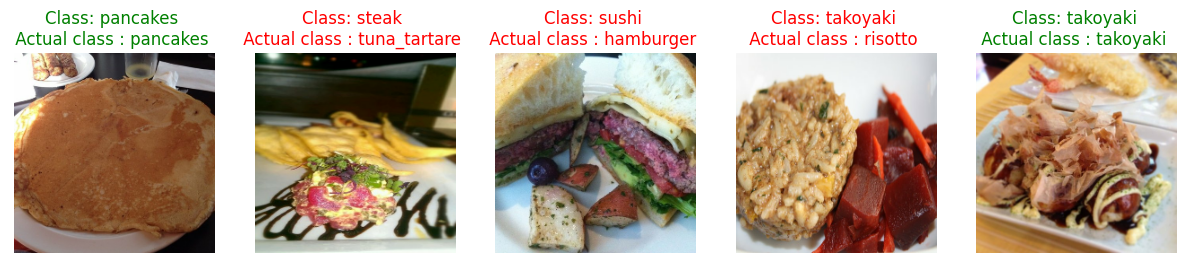

2025-02-13 15:35:02.767415: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [44]:
modelgraph.DisplayModelPredictions(model_50e_mixaug,train_11_dataset,class_names)

## Preparing a network for transfer learning

First thing we need is to have installed tensorflow_hub in our library so we can fetch the models from the official kaggle repository. The second step is to choose what kind of model we want to retrieve to use in our experiments.

As we are dealing at the moment with an image classification problem, [efficientnet-v2 by google](https://www.kaggle.com/models/google/efficientnet-v2/) is the model we will test for this chapter of this notebook.

When we do transfer learning, we use a pre-built model that has the weight trained for detecting different characteristics or features from an image (in our image classification case), while we add at the end some extra layers to tune the new output.

The model is pretrained for image recognision, so when we introduce a new dataset, the output layer will change as we will expect different type and number of classes compared to what the original model was trained for.


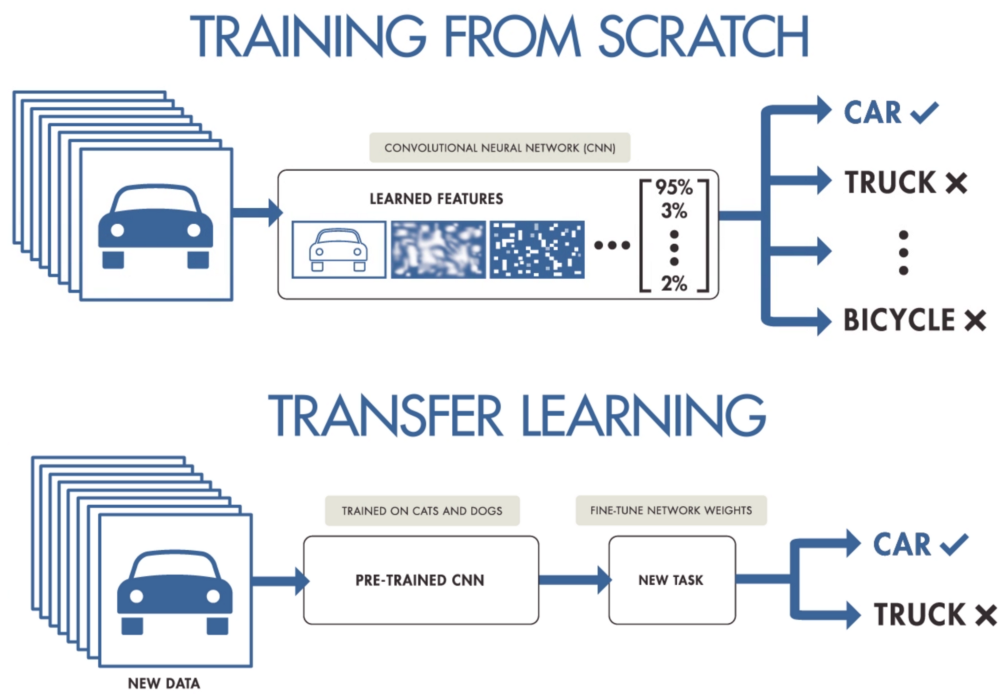

As we will have more powerfull model, let's also try to have a lighter version of the 11 class dataset to train the new model and see the difference in the perfomance.

In [45]:
# Define directory path
training_light_dir= "../Sources/Food-101-11-light/train"

In [46]:
for dirpath, dirnames, filenames in os.walk(training_light_dir):
  print(f" {len(dirnames)} Directories and {len(filenames)} images in '{dirpath}'.")

 11 Directories and 0 images in '../Sources/Food-101-11-light/train'.
 0 Directories and 77 images in '../Sources/Food-101-11-light/train/hamburger'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/pancakes'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/oysters'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/risotto'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/tuna_tartare'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/tiramisu'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/sushi'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/steak'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/tacos'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/waffles'.
 0 Directories and 100 images in '../Sources/Food-101-11-light/train/takoyaki'.


In [47]:
# Create datasets
train_light_dataset = tf.keras.preprocessing.image_dataset_from_directory(training_light_dir,
                                               batch_size=32, # number of images to process at a time 
                                               image_size=(224, 224),# resize image to the designated value
                                               label_mode="categorical", # only working witht two labels
                                               shuffle=True, # mixes images from both folders.
                                               seed=10)


Found 825 files belonging to 11 classes.


In [48]:
# Load tensorflow hub and layers to build the new TL model
# Load tf_keras as tensorflow hub has some compatibility problems
# with tensorflow.keras
import tensorflow_hub as hub
import tf_keras as keras

In [49]:
# Load the path for the model we want.
efficientnet_b0_fv_path = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"

As we have faced some problems with mismatched versions, let's recap here what versions are we using. TF Hub can have some issues with Tensorflow when it comes to loading a model from Kaggle as a keras layer.

In [50]:
version_fn = getattr(tf.keras, "version", None)
print("TF Version: " + tf.__version__)
print("TF Keras Version: " + version_fn())
print("TF Hub version " + hub.__version__)

TF Version: 2.18.0
TF Keras Version: 3.8.0
TF Hub version 0.16.1


The procedure goes as following:

1. We create a keras layer that is a copy of the whole model we are aiming to use for our classification problem. We define if we want the weights to be modified from the core model with the parameter trainable ( which for us, we are not interested. We will only add and modify some layers added at the end).

2. We add this layer to a sequential model, and then add a dense layer with a softmax activation layer as our new output layer for creating probabilities for our specific problem.

In [51]:
efficientnet_b0_layer = hub.KerasLayer(efficientnet_b0_fv_path,
                   trainable=False,
                   name="efficientnet_model",
                   input_shape=(224, 224, 3))


Now we create the base model which will contain our efficientnet layer, which is actually a model we will introduce into another model.

In [52]:
efficientnet_b0_model = keras.Sequential()

In [53]:
efficientnet_b0_model.add(efficientnet_b0_layer)

Let's see if the model was successfully added by checking its parameters.

In [54]:
efficientnet_b0_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet_model (KerasL  (None, 1280)              5919312   
 ayer)                                                           
                                                                 
Total params: 5919312 (22.58 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


We can see how our model holds from the layer that equals to the efficientnet model 5.919k parameters. Comparing to our model, efficientnet is almost 5 times larger.

We still need to add the last dense layer, so we will add it to our sequential model : 

In [55]:

efficientnet_b0_model.add(keras.layers.Dense(len(class_names), activation='softmax'))

Let's review again the composition of our model.

In [56]:
efficientnet_b0_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet_model (KerasL  (None, 1280)              5919312   
 ayer)                                                           
                                                                 
 dense_1 (Dense)             (None, 11)                14091     
                                                                 
Total params: 5933403 (22.63 MB)
Trainable params: 14091 (55.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [57]:

# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Following the previous times we have built a model, we have 3 steps defyining steps : 

1. Create the model.
2. Build the model.
3. Compile the model.

So as we have completed the first step, let's continue with the two we have left :

In [58]:
# Notice due to the compatibility problems we were mentioning,
# we need to use the tf_keras library for our model, not the tensorflow library.
# 2. Compile the model
efficientnet_b0_model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])



In [59]:
# 3. Fit the model
efficientnet_b0_model_history = efficientnet_b0_model.fit(train_light_dataset, 
                                              epochs=5,
                                              steps_per_epoch=len(train_light_dataset),
                                              validation_data=test_11_dataset,
                                              validation_steps=len(test_11_dataset),
                                              callbacks=[create_tensorboard_callback(dir_name="kaggle_hub", 
                                                                                     experiment_name="efficientnet_b0")])

Saving TensorBoard log files to: kaggle_hub/efficientnet_b0/20250213-153508
Epoch 1/5


26/26 [==============================] - 20s 439ms/step - loss: 55.8436 - accuracy: 0.0970 - val_loss: 48.3514 - val_accuracy: 0.0979
Epoch 2/5
26/26 [==============================] - 8s 319ms/step - loss: 33.8968 - accuracy: 0.1394 - val_loss: 43.6056 - val_accuracy: 0.1070
Epoch 3/5
26/26 [==============================] - 8s 322ms/step - loss: 24.0953 - accuracy: 0.1976 - val_loss: 41.0047 - val_accuracy: 0.1045
Epoch 4/5
26/26 [==============================] - 10s 386ms/step - loss: 17.3141 - accuracy: 0.2545 - val_loss: 40.4404 - val_accuracy: 0.1070
Epoch 5/5
26/26 [==============================] - 10s 387ms/step - loss: 13.1999 - accuracy: 0.3115 - val_loss: 39.9421 - val_accuracy: 0.1145


Let's try to have another model to compare where we run the full training dataset.

In [60]:
# 1. Create the model

efficientnet_b0_model_2 = keras.Sequential()
efficientnet_b0_model_2.add(efficientnet_b0_layer)
efficientnet_b0_model_2.add(keras.layers.Dense(len(class_names), activation='softmax'))

# 2. Compile the model
efficientnet_b0_model_2.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Fit the model
efficientnet_b0_model_2_history = efficientnet_b0_model_2.fit(train_11_dataset, 
                                              epochs=5,
                                              steps_per_epoch=len(train_11_dataset),
                                              validation_data=test_11_dataset,
                                              validation_steps=len(test_11_dataset),
                                              callbacks=[create_tensorboard_callback(dir_name="kaggle_hub", 
                                                                                     experiment_name="efficientnet_b0_2")])

Saving TensorBoard log files to: kaggle_hub/efficientnet_b0_2/20250213-153936
Epoch 1/5
241/241 [==============================] - 33s 122ms/step - loss: 41.4204 - accuracy: 0.1108 - val_loss: 33.2457 - val_accuracy: 0.1270
Epoch 2/5
241/241 [==============================] - 32s 134ms/step - loss: 26.0607 - accuracy: 0.1377 - val_loss: 29.1737 - val_accuracy: 0.1179
Epoch 3/5
241/241 [==============================] - 30s 126ms/step - loss: 20.2318 - accuracy: 0.1729 - val_loss: 27.5774 - val_accuracy: 0.1191
Epoch 4/5
241/241 [==============================] - 30s 124ms/step - loss: 17.0748 - accuracy: 0.1930 - val_loss: 25.6177 - val_accuracy: 0.1297
Epoch 5/5
241/241 [==============================] - 37s 154ms/step - loss: 15.1667 - accuracy: 0.2199 - val_loss: 25.2802 - val_accuracy: 0.1300


These results are not as good as we were expecting. The main problems we are experiencing here are :

1. **Low accuracy for a pretrained model**, where the base accuracy and validation accuracy are lower than the model we trained from zero. Both values should be higher for a pretrained model , so there is something that is not working as expected.

2. **Time consumption for training**, as training the last two layers for more than two minutes for 5 epochs is too large. Clearly we are missing GPU usage when using tf_keras.

Let's try another model now.

## Trying other models for Transfer Learning

In [ ]:
# We define some static variables we will commonly use in this notebook.
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

Let's also create a function to sped up and simplify the procedure we use to create new models from kaggle hub.

In [ ]:
def create_model(model_url, num_classes=11):
  """Introduce a model url and number of classes to return a fully created model for a local use.
  
  Args:
    model_url : url string from kaggle hub.
    num_classes : number of classes we want for our last layer.
  Returns:
    model: keras model that needs to be compiled and trained for the last layer.
  """
  # Load model into a keras layer replica.
  model_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='kaggle_model',
                                           input_shape=IMAGE_SHAPE+(3,))
  
  # Create our own model
  model = keras.Sequential([
    model_layer, # base model downloaded from kaggle.
    keras.layers.Dense(num_classes, activation='softmax', name='output_layer')   
  ])

  return model

Let's try with resnet now, and see the differences in accuracy.

In [63]:
resnet_v2_url = "https://kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/1"

Let's create and compile the model with our new function.

In [ ]:
# 1. Create model
resnet_model = create_model(resnet_v2_url, num_classes=11)

# 2. Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=keras.optimizers.Adam(),
                     metrics=['accuracy'])

Let's train the model with the original dataset and compare differences in training efficiency and accuracy.

In [66]:
# Fit the model
resnet_history = resnet_model.fit(train_11_dataset,
                                  epochs=5,
                                  steps_per_epoch=len(train_11_dataset),
                                  validation_data= test_11_dataset,
                                  validation_steps=len(test_11_dataset),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20250213-155511
Epoch 1/5
241/241 [==============================] - 48s 162ms/step - loss: 49.3985 - accuracy: 0.1649 - val_loss: 38.4645 - val_accuracy: 0.1652
Epoch 2/5
241/241 [==============================] - 44s 182ms/step - loss: 28.5612 - accuracy: 0.2017 - val_loss: 31.2480 - val_accuracy: 0.1942
Epoch 3/5
241/241 [==============================] - 112s 467ms/step - loss: 24.6161 - accuracy: 0.2264 - val_loss: 20.6019 - val_accuracy: 0.2333
Epoch 4/5
241/241 [==============================] - 151s 628ms/step - loss: 24.8196 - accuracy: 0.2366 - val_loss: 20.9502 - val_accuracy: 0.2542
Epoch 5/5
241/241 [==============================] - 189s 783ms/step - loss: 23.7772 - accuracy: 0.2410 - val_loss: 23.5577 - val_accuracy: 0.2330


As for now, we can see that training this model from tensorflow hub as it needs to use the specific tf_keras library is not optimal for local use.

Transfer learning has a big potential but creating and training our own models at this moment is faster and better.

This will be updated once a more effective solution is found for this issue.